<a href="https://colab.research.google.com/github/omermosa/MINST-GAN/blob/main/MINST_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
keras=tf.keras

In [ ]:
import numpy as np

In [ ]:
(x_tr,y_tr),(x_t,y_t)=tf.keras.datasets.mnist.load_data()

In [ ]:
x_tr, y_tr,x_t,y_t=tf.convert_to_tensor(x_tr),tf.convert_to_tensor(y_tr),tf.convert_to_tensor(x_t),tf.convert_to_tensor(y_t)

In [ ]:
np.random.normal()

0.06675840269680325

In [ ]:
def noise_vals(*shape):
  return tf.random.normal(shape,0,1)

In [ ]:
class discriminator(object):
  def __init__(self,m,img_dim):
    self.m=m
    self.img_dim=img_dim

  def gen_block(self,inp,i):
    x=keras.layers.Dense(2**(11-i),activation='relu')(inp)
    #x=keras.layers.LeakyReLU(0.2)(x)
    #x=keras.layers.BatchNormalization()(x)
    x=keras.layers.Dropout(0.3)(x)
    return x
  
  def disc_model(self,n_layers):
    #inp=keras.layers.Input(self.img_dim)
    #x=inp
    #for i in range(1,n_layers+1):
    #  x=self.gen_block(x,i)
    disc_model=keras.models.Sequential()
    disc_model.add(keras.layers.Dense(1024,input_shape=(self.img_dim,),activation='relu'))
    disc_model.add(keras.layers.Dropout(0.3))

    disc_model.add(keras.layers.Dense(512,activation='relu'))
    disc_model.add(keras.layers.Dropout(0.3))
    disc_model.add(keras.layers.Dense(256,activation='relu'))
    disc_model.add(keras.layers.Dropout(0.3))

    disc_model.add(keras.layers.Dense(1,activation='sigmoid'))
    disc_model.compile(optimizer=keras.optimizers.Adam(lr=0.0002,beta_1=0.5),loss='binary_crossentropy',metrics=['accuracy'])

 #   x=keras.layers.Dense(1,activation='sigmoid')(x)
    
    return disc_model

In [ ]:
class generator(object):
  def __init__(self,m,img_dim,noise=30):
    self.m=m
    self.img_dim=img_dim
    self.noise=noise

  def gen_block(self,inp,i):
    x=keras.layers.Dense(2**(i+7),activation='relu')(inp)
    #x=keras.layers.LeakyReLU(0.2)(x)
    #x=keras.layers.BatchNormalization()(x)
    #x=keras.layers.Dropout(0.3)(x)
    return x
  
  def generator_model(self,n_layers):
    #inp=keras.layers.Input(self.noise)
    #x=inp
    #for i in range(1,n_layers+1):
     # x=self.gen_block(x,i)
    gen_model=keras.models.Sequential()
    gen_model.add(keras.layers.Dense(256,input_shape=(self.noise,),activation='relu'))
    gen_model.add(keras.layers.Dense(512,activation='relu'))

    gen_model.add(keras.layers.Dense(1024,activation='relu'))
    gen_model.add(keras.layers.Dense(self.img_dim,activation='sigmoid'))
    gen_model.compile(optimizer=keras.optimizers.Adam(lr=0.0002,beta_1=0.5),loss='binary_crossentropy',metrics=['accuracy'])

    #x=keras.layers.Dense(self.img_dim,activation='sigmoid')(x)
    
    return gen_model
  


In [ ]:
gen_model=generator(x_tr.shape[0],x_tr.shape[1]**2,100).generator_model(3)
disc_model=discriminator(x_tr.shape[0],x_tr.shape[1]**2).disc_model(3)

In [ ]:
disc_model.trainable=False
inp=keras.layers.Input(100)
g=gen_model(inp)
d=disc_model(g)
gan=keras.Model(inp,d)

In [ ]:
gan.compile(optimizer=keras.optimizers.Adam(lr=0.0002,beta_1=0.5),loss='binary_crossentropy',metrics=['accuracy'])

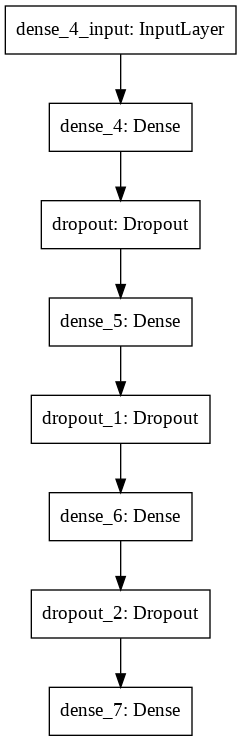

In [ ]:
keras.utils.plot_model(disc_model)

In [ ]:
gen_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               25856     
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_3 (Dense)              (None, 784)               803600    
Total params: 1,486,352
Trainable params: 1,486,352
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tqdm import tqdm_notebook as tqdm

In [ ]:
x_tr=tf.cast(x_tr,dtype=tf.float32)
x_tr/=255

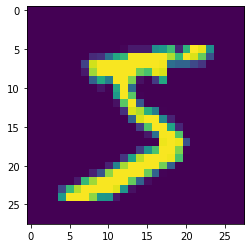

In [ ]:

import matplotlib.pyplot as plt

plt.imshow(x_tr[0],vmax=1,vmin=0)

In [ ]:
def plot(gen_model):
  noise=noise_vals(*(10,100))
  gen_imgs=gen_model(noise)
  plt.figure(figsize=(12,12))
  for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(tf.reshape(gen_imgs[i],(28,28)),vmax=1,vmin=0, interpolation='nearest', cmap='gray_r')
    plt.axis('off')

  plt.show()




## Train the GAN

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


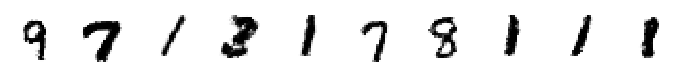

dl [0.4028461277484894, 0.828125] gl [2.5043656826019287, 0.09375]


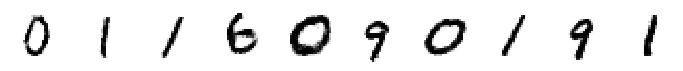

dl [0.38855764269828796, 0.828125] gl [1.7056360244750977, 0.1875]


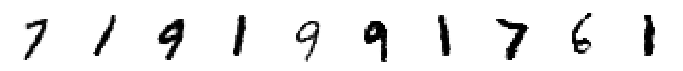

dl [0.29200729727745056, 0.875] gl [2.0952634811401367, 0.15625]


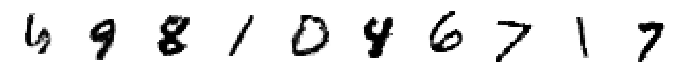

dl [0.26420533657073975, 0.90625] gl [1.9616529941558838, 0.15625]



In [ ]:
for i in tqdm(range(50)):
  batch_size=32
  n_baches=x_tr.shape[0]//batch_size
  for b in (range(n_baches-1)):
    batch=x_tr[b*batch_size:(b+1)*batch_size]
    bs=batch.shape[0]
    noise=noise_vals(*(batch.shape[0],100))
    gen_imgs=gen_model(noise)
    disc_model.trainable=True
    #ytrue=tf.ones((batch.shape[0],1))
    #disc_model.train_on_batch(tf.reshape(batch,(bs,-1)),ytrue)
    ytrue=np.zeros((batch.shape[0]*2,1))
    ytrue[bs:]=1
    X=tf.concat((gen_imgs,tf.reshape(batch,(bs,-1))),axis=0)
    dl=disc_model.train_on_batch(X,ytrue)
    disc_model.trainable=False
    noise=noise_vals(*(batch.shape[0],100))
    y=tf.ones((batch.shape[0],1))
    gl=gan.train_on_batch(noise,y)
  if i%15==0:
    plot(gen_model)
    print('dl', dl,'gl',gl)







In [ ]:
keras.models.save_model(gen_model,'gen.h5')

In [ ]:
noise=np.random.randn(10,100)

In [ ]:
gen_imgs=gen_model(noise)

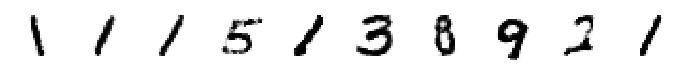

In [ ]:
plt.figure(figsize=(12,12))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(tf.reshape(gen_imgs[i],(28,28)),vmax=1,vmin=0, interpolation='nearest', cmap='gray_r')
  plt.axis('off')

plt.show()

In [ ]:
!cp -r /content/gen.h5 /content/drive/My\ Drive/TF\ Codes/MINST\ GAN

In [ ]:
noise=noise_vals(*(1,100))
tf.reshape(gen_model(noise),(28,28))*255

<tf.Tensor: shape=(28, 28), dtype=float32, numpy=
array([[6.99317756e-11, 2.83444004e-13, 2.73563724e-12, 5.30149752e-12,
        2.04162620e-12, 3.60679390e-12, 1.49731460e-11, 2.54517275e-11,
        4.79680878e-12, 3.11246688e-12, 9.24654884e-12, 1.25898966e-13,
        1.77860534e-13, 1.53651935e-11, 1.33523886e-11, 1.64448403e-12,
        8.11745463e-12, 2.11745638e-11, 1.63163753e-11, 1.03491803e-12,
        1.85735534e-08, 1.80195980e-11, 2.22374879e-11, 8.56326468e-12,
        3.05552424e-11, 1.52481812e-11, 1.24906888e-12, 9.96707664e-12],
       [1.19967181e-09, 7.84006887e-12, 3.69655521e-12, 8.23614939e-13,
        2.34184894e-11, 2.02519728e-12, 1.82428204e-12, 2.03390429e-11,
        7.61176278e-09, 3.61846178e-11, 4.34521478e-13, 5.64082669e-10,
        2.70604360e-14, 1.98884975e-09, 7.68047210e-15, 1.84772720e-15,
        1.12210637e-15, 1.25790759e-16, 3.33833091e-15, 7.82219172e-15,
        8.55940210e-14, 4.64933918e-13, 6.38545994e-10, 5.83964265e-07,
        3.063

In [ ]:
noise=noise_vals(*(128,30))

In [ ]:
import matplotlib.pyplot as plt
gen_imgs=tf.reshape(gen_imgs, (-1,28,28))